### Langchain Version V1

### Agents

In [1]:
import langchain
langchain.__version__

'1.2.0'

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]= os.getenv("OPENAI_API_KEY")

#### Create an Agent

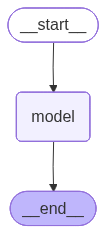

In [3]:
from langchain.agents import create_agent

agent = create_agent(
    model = "gpt-5",
    tools = [], # here is empty
    system_prompt = "You are a helpful assistant."
)
agent

The defined fucntions like get_weather() can be added as a tool to the LLM model.

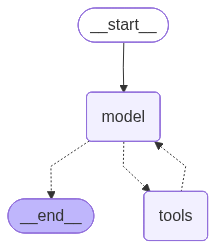

In [4]:
from langchain.agents import create_agent

def get_weather(city:str)-> str:

    """Get the weather for a city."""
    return f"The weather in {city} is sunny."

agent = create_agent(
    model = "gpt-5",
    tools = [get_weather], # here is empty
    system_prompt = "You are a helpful assistant."
)
agent

#### Run the agent

In [6]:
response = agent.invoke({"messages": [{"role":"user", "content":"What is the weather like in New York?"}]})

In [8]:
response["messages"]

[HumanMessage(content='What is the weather like in New York?', additional_kwargs={}, response_metadata={}, id='50f86d07-7202-4147-87f5-2b1049f52a11'),
 AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 216, 'prompt_tokens': 143, 'total_tokens': 359, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 192, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-Cq3aLY7ZzHt8jziFKLRJDWLoY1uNN', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b4cf7-e56b-7aa1-83b7-ace37d8e2f06-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'New York'}, 'id': 'call_BGlXBrlkHhog5VD3dtOdQmNy', 'type': 'tool_call'}], usage_metadata={'input_tokens': 143, 'output_tokens': 216, 'total_tokens': 359, '

In [9]:
response["messages"][-1]

AIMessage(content='It’s sunny in New York.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 144, 'prompt_tokens': 180, 'total_tokens': 324, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-Cq3aQNlM9ah2lwHvgammhy4k7BQ1j', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b4cf7-f3d8-7af3-b078-80b8a09b398d-0', usage_metadata={'input_tokens': 180, 'output_tokens': 144, 'total_tokens': 324, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 128}})

In [10]:
agent.invoke({"messages":"What is the weather in New Yourk"})

{'messages': [HumanMessage(content='What is the weather in New Yourk', additional_kwargs={}, response_metadata={}, id='f7f83afc-cc7d-40ee-b014-a9f5547f1e55'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 408, 'prompt_tokens': 142, 'total_tokens': 550, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 384, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-Cq3b1Vg2z7s0JoEYFiHtYPBqoH4zY', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b4cf8-87db-7c80-acf1-b380f1abfcf0-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'New York'}, 'id': 'call_oINO89Wi5FR30yS7Xm6pCCyE', 'type': 'tool_call'}], usage_metadata={'input_tokens': 142, 'output_tokens': 408, 'total_tokens